En este problema resolveremos el lagrangiano del movimiento para dos péndulos de igual longitud e iguales masas que están conectados por un resorte, como se puede observar en la siguiente figura.

<img src="pendulo.png"> 

Consideraremos b=l

# Solución

Primero empezamos haciendo uso de la  dinámica lagrangiano con el propósito de hallar las ecuaciones del movimiento para los péndulos de la figura anterior.

\begin{equation}
\frac{\partial l}{\partial \theta _{1}}-\frac{\mathrm{d} }{\mathrm{d} t}\left ( \frac{\partial l}{\partial \dot{\theta _{1}}} \right ) = 0
\end{equation}


Elegiremos de la figura anterior como coordenadas generalizadas. La energía potencial la elegimos de tal forma que sea cero en la posición de equilibrio. Las energías cinéticas y potencial  del sistema son para ángulos pequeños.


Para las coordenadas tenemos:

\begin{equation*}
x_{1}=l\theta  \Rightarrow \, \dot{x_1}=l\dot{\theta _{1}}
\end{equation*}

\begin{equation}
x_{2}=l\varphi \Rightarrow \, \dot{x_2}=l\dot{\theta _{2}} + l 
\end{equation}

\begin{equation}
 y_1=-l \Rightarrow\, \dot{y_1}=0
\end{equation}

\begin{equation}
y_2=-l \Rightarrow \, \dot{y_2}=0
\end{equation}


Entonces:

\begin{equation}
L=T-U
\end{equation}

calculado la energía cinetica tenemos:

\begin{equation}
T=\frac{1}{2}mv^{2}
\end{equation}

Por tanto:

\begin{equation}
T=\frac{1}{2}m\left( l^2\dot{\theta _{1}}^2\right)+\frac{1}{2}m\left( l^2\dot{\theta _{2}}^2\right)
\end{equation}

calculado la energía potencial tenemos:

\begin{equation}
U=\frac{1}{2}k\Delta x^{2}
\end{equation}

Por tanto:

\begin{equation}
U=mgl\left ( 1-cos\theta _{1} \right ) + mgl\left ( 1-cos\theta _{2} \right )+\frac{1}{2}
\left ( lsen\theta _{1}-lsen\theta _{2} \right )^{2}
\end{equation}

Como mencionamos anteriormente, para pequeñas oscilaciones($cos\theta \approx 1 - \frac{\theta ^{2}}{2};\,sen\theta \approx \theta$), 

\begin{equation}
U=\frac{mgl}{2}\left(\theta _{1}^2+\theta _{2}^2\right)+\frac{kl^2}{2}\left(\theta _{1}-\theta _{2}\right)^2
\end{equation}

Por tanto el lagrangiano queda:

\begin{equation}
L=\frac{1}{2}m\left( l^2\dot{\theta _{1}}^2\right)+\frac{1}{2}m\left( l^2\dot{\theta _{2}}^2\right)-\frac{mgl}{2}\theta _{1}^2-\frac{mgl}{2}\theta _{2}^2-\frac{kl^2}{2}\left(\theta _{1}-\theta _{2}\right)^2
\end{equation}

Aplicando la ecuacion de euler lagrange para $\theta _{1}$:

\begin{equation}
\frac{\partial L}{\partial\theta _{1}}-\frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\theta _{1}}}\right)=0
\end{equation}

\begin{equation}
\frac{\partial L}{\partial\theta _{1}}=-mgl\theta _{1}-kl^2(\theta _{1}-\theta _{2})
\end{equation}

\begin{equation}
\frac{\partial L}{\partial \dot{\theta _{1}}}=ml^2\dot{\theta _{1}} \, \Rightarrow \, \frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\theta _{1}}}\right)=ml^2\ddot{\theta _{1}}
\end{equation}


\begin{equation}
\Rightarrow -mgl\theta _{1}-kl^2(\theta _{1}-\theta _{2})-ml^2\ddot{\theta _{1}}=0
\end{equation}


Cancelando los negativos y multiplicando la ecuación diferencial por $ml^2$ tenemos:

\begin{equation}
\ddot{\theta _{1}}+\frac{g}{l}\theta _{1}+\frac{k}{m}(\theta _{1}-\theta _{2})=0
\end{equation}

La cual seria nuestra primer ecuación del movimiento


aplicando la ecuación de Euler lagrange para $\theta _{2}$:

\begin{equation}
\frac{\partial L}{\partial\theta _{2}}-\frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\theta _{2}}}\right)=0
\end{equation}

\begin{equation}
\frac{\partial L}{\partial\theta _{2}}=-mgl\theta _{2}+kl^2(\theta _{1}-\theta _{2})
\end{equation}

\begin{equation}
\frac{\partial L}{\partial \dot{\theta _{2}}}=ml^2\dot{\theta _{2}} \, \Rightarrow \, \frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\theta _{2}}}\right) = ml^2\ddot{\theta _{2}} 
\end{equation}

\begin{equation}
\Rightarrow mgl\theta _{2}-kl^2(\theta _{1}-\theta _{2})+ml^2\ddot{\theta _{2}} =0
\end{equation}

Reorganizando terminos con el fin de que $\ddot{\theta _{2}}$ quede solo tenemos:

\begin{equation}
\ddot{\theta _{2}}+\frac{y}{l}\theta _{2}-\frac{k}{m}(\theta _{1}-\theta _{2})=0
\end{equation}

La cual seria nuestra segunda ecuación del movimiento



In [1]:
#metodo Odein

from numpy import array, linspace, shape,matrix,transpose
from math import sin, cos, pi,sqrt,atan
from scipy.integrate import odeint
from vpython import  curve,box,cylinder,helix,sphere, scene, vector, color, arrow, text, sleep

# Bajando de orden a las ecuciones del movimiento

def solucion (f,t,g,l,k,m):
    df1=f[1]
    df2=-(g/l)*f[0]-(k/m)*(f[0]-f[2])
    df3=f[3]
    df4=-(g/l)*f[2]+(k/m)*(f[0]-f[2])
    return array([df1,df2,df3,df4])

# Condiciones iniciales

l=12
k=2
m=40
g=9.8
thetaI=5*pi/180
thetaIp=0
phiI=15*pi/180
phiIp=0
tI=0
tf=100
n=1000


t=linspace(tI,tf,n)
condINI=array([thetaI,thetaIp,phiI,phiIp])
sol=odeint(solucion,condINI,t,args=(g,l,k,m))
xp=l*thetaI
yp=-l
zp=0
r=1

pendulo1=sphere(pos=vector(xp,yp,zp),radius=r,color=color.yellow)#,make_trail=True)#,trail_type="points")
pendulo2=sphere(pos=vector(xp+l,yp,zp),radius=r,color=color.blue)#,make_trail=True)#,trail_type="points")
#cuerda1=curve(vector(0,0,0),pendulo1.pos)
#cuerda2=curve(vector(l,0,0),pendulo2.pos)

cuerdas1=cylinder(pos=pendulo2.pos,axis=vector(0,0,0),radius=0.1,color=color.white)
cuerdas2=cylinder(pos=pendulo2.pos,axis=vector(l,0,0),radius=0.1,color=color.white)
base=box(pos=vector(l/2,0,0),size=vector(l+2,0.1,0.1),color=color.orange)
spring=helix(pos=pendulo2.pos,axis=vector(0,0,0),radius=0.3,constant=k,thickness=0.1,coils=10,color=color.white)
ti=0
while ti<tf:
    sleep(0.01)
    pendulo1.pos=vector(l*sol[ti,0],yp,zp)
    pendulo2.pos=vector(l*sol[ti,2]+l,yp,zp)
    #cuerda1=curve(vector(0,0,0),pendulo1.pos)
    #cuerda2=curve(vector(l,0,0),pendulo2.pos)
    cuerdas2.pos=pendulo2.pos
    cuerdas2.axis=vector(l,0,0)-cuerdas2.pos
    cuerdas1.pos=pendulo1.pos
    cuerdas1.axis=vector(0,0,0)-cuerdas1.pos
    spring.pos=pendulo1.pos
    spring.axis=pendulo2.pos-spring.pos
    ti = ti + 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
from matplotlib.pyplot import plot as plt
from pylab import plot, show, legend, xlabel, ylabel, title, grid

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


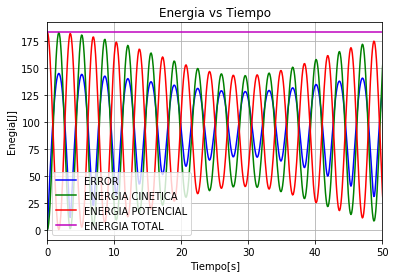

In [3]:
import numpy as np
from matplotlib.pyplot import plot as plt
from pylab import plot, show, legend, xlabel, ylabel, title, grid
import matplotlib.pyplot as plt
#energia

ki=((1/2)*m*(l*thetaIp)**2)+(1/2)*m*(l*phiIp)**2
ui=(m*g*l/2)*((thetaI**2)+(phiI**2))+((k*(l)**2)/2)*(thetaI-phiI)**2
KIV=ki*np.ones((n,1))#valor inicial de la energia cinetica
UIV=ui*np.ones((n,1))#valor inical de la energia potencial 
K=((m/2)*(l*sol[:,1])**2)+(m/2)*(l*sol[:,3])**2#energia cinetica
U=(m*g*l/2)*((sol[:,0]**2)+(sol[:,2]**2))+((k*(l)**2)/2)*(sol[:,0]-sol[:,2])**2#energia potencial
E=K+U#energia total
KdTe=(l**2)*(m*sol[:,1])#derivada parcial de la energia cinetica con respecto a theta punto
KdPhi=(l**2)*(m*sol[:,3])#derivada parcial de la energia cinetica con respecto a phi
UdTe=(k*(2*sol[:,0]-2*sol[:,2])*l**2)/2 + g*m*sol[:,0]*l#derivada parcial de la energia potencial con respecto a theta
UdPhi=g*l*m*sol[:,2]-(k*l**2*(2*sol[:,0]-2*sol[:,2]))/2#derivada parcial de la energia potencial con respecto a phi

Paso=(tf/n)
ERT=[]
for i in range (0,n):
    ERTHe=sqrt(((Paso*KdTe[i])**2)+((Paso*KdPhi[i])**2))
    ERT.append(ERTHe)

plot (t,ERT,'b', label='ERROR')
plot (t,K,'g', label='ENERGIA CINETICA')
plot (t,U,'r', label='ENERGIA POTENCIAL')
plot (t,E,'m', label='ENERGIA TOTAL')
plt.grid('on')
plt.xlim(0,50)
title('Energia vs Tiempo')
xlabel('Tiempo[s]')
ylabel('Enegia[J]')
legend(loc='lower left')
show()

Con respecto a la grafica de la energía vs tiempo podemos observar que la energía total es una constante, debido a que es la suma de la energía cinética y la potencial. Con respecto a la energía potencial como esta tiene dependencia del resorte esta oscila, cuando esta oscilación alcanza su máximo en la posición la energía potencial  sera máxima, la energía cinética  a su vez va a depender de la velocidad en que oscilan los péndulas.
También podemos observar en la grafica que  cuando el valor de energía potencial es máximo, el valor de la energía cinética se encuentra en un mínimo.